In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
class ConwaysGame:

    def __init__(self, grid_size=(50,50)):
        self.grid_size = grid_size
        self.grid_l = grid_size[0]
        self.grid_w = grid_size[1]
        self.init_grid()


    def init_grid(self):
        p_ones = 0.7
        self.grid = np.random.choice([0,1], self.grid_size, p=((1-p_ones),p_ones)) # seed random start 
        self.grids = []
        self.grids.append(self.grid)
        
    def lookup_neighbor_vals(self, i,j):
        # return right index
        neighbors_list = []
        neighbor_indices = [[i+i,j], [i-1,j],[i,j+1],[i,j-1],[i+1, j+1],[i+1,j-1],[i-1,j+1],[i-1,j-1]]
        for neighbor in neighbor_indices:
            try: 
                n_val = self.grid[neighbor[0], neighbor[1]]
            except:
                n_val = 0
            neighbors_list.append(n_val)
        return neighbors_list

    def update_cell(self, cell_i, cell_j):
        cell_val = self.grid[cell_i, cell_j]
        neighbor_vals = self.lookup_neighbor_vals(cell_i, cell_j)
        total_neighbors = np.sum(neighbor_vals)
        if cell_val==0:
            if total_neighbors==3:
                new_val = 1
            else: 
                new_val = 0
        elif cell_val==1:
            if (total_neighbors==2) | (total_neighbors==3):
                new_val = 1
            else:
                new_val = 0
        return new_val

    def update_grid(self):
        new_grid = np.zeros(self.grid_size)
        self.track_ids = []
        for i in range(0, self.grid_l):
            for j in range(0, self.grid_w):
                self.track_ids.append([i,j])
                new_grid[i,j] = self.update_cell(i,j)
        self.grid = new_grid
        self.grids.append(self.grid)

    def run_game_for_x_turns(self, x=100):
        for i in range(0, x):
            self.update_grid()
                
        
    
        





In [83]:
game_obj = ConwaysGame()

game_obj.grid


array([[1, 0, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 0, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 1]])

In [84]:
game_obj.run_game_for_x_turns()

[]

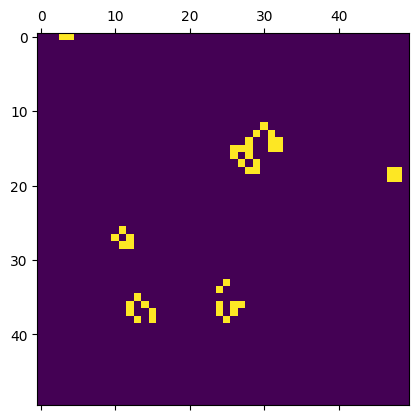

In [91]:
plt.matshow(game_obj.grids[20])
plt.plot()

In [ ]:
# next use this to animate? https://matplotlib.org/stable/api/animation_api.html